In [13]:
import pandas as pd
import prophet
from prophet import Prophet
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('./2023-08-26 1_27pm (3).csv')
df=df.dropna()
df

DATE     AREA AREA_TYPE  POPULATION  CASES  CUMULATIVE_CASES  \
94     2020-05-05  Alameda    County   1685886.0   59.0            2239.0   
95     2020-05-06  Alameda    County   1685886.0   43.0            2282.0   
96     2020-05-07  Alameda    County   1685886.0   38.0            2320.0   
97     2020-05-08  Alameda    County   1685886.0   60.0            2380.0   
98     2020-05-09  Alameda    County   1685886.0   43.0            2423.0   
...           ...      ...       ...         ...    ...               ...   
49756  2022-04-07     Yuba    County     79290.0    4.0           15848.0   
49762  2022-04-13     Yuba    County     79290.0    5.0           15862.0   
49763  2022-04-14     Yuba    County     79290.0    4.0           15866.0   
49767  2022-04-18     Yuba    County     79290.0    8.0           15882.0   
49770  2022-04-21     Yuba    County     79290.0    2.0           15897.0   

       DEATHS  CUMULATIVE_DEATHS  TOTAL_TESTS  CUMULATIVE_TOTAL_TESTS  \
94        1.0               74.0       1228.0                   30098   
95        2.0               76.0       1304.0                   31402   
96        1.0               77.0       1339.0                   32741   
97        2.0               79.0       1787.0                   34528   
98        1.0               80.0        553.0                   35081   
...       ...                ...          ...                     ...   
49756     0.0              112.0        194.0                  162748   
49762     0.0              112.0        157.0                  163560   
49763     0.0              112.0        202.0                  163762   
49767     0.0              112.0        215.0                  164236   
49770     0.0              112.0        216.0                  164825   

       POSITIVE_TESTS  CUMULATIVE_POSITIVE_TESTS  REPORTED_CASES  \
94               65.0                       1925            57.0   
95               78.0                       2003            45.0   
96               38.0                       2041            50.0   
97               83.0                       2124            41.0   
98               18.0                       2142            56.0   
...               ...                        ...             ...   
49756             5.0                      18736             9.0   
49762             5.0                      18752             0.0   
49763             6.0                      18758             6.0   
49767            11.0                      18779            11.0   
49770             4.0                      18795            20.0   

       CUMULATIVE_REPORTED_CASES  REPORTED_DEATHS  CUMULATIVE_REPORTED_DEATHS  \
94                        1819.0              2.0                        67.0   
95                        1864.0              0.0                        67.0   
96                        1914.0              1.0                        68.0   
97                        1955.0              2.0                        70.0   
98                        2011.0              1.0                        71.0   
...                          ...              ...                         ...   
49756                    15848.0              0.0                       121.0   
49762                    15851.0              0.0                       121.0   
49763                    15857.0              0.0                       121.0   
49767                    15868.0              0.0                       121.0   
49770                    15888.0              0.0                       121.0   

       REPORTED_TESTS  
94              618.0  
95             1120.0  
96             1031.0  
97             1194.0  
98             1301.0  
...               ...  
49756           502.0  
49762           609.0  
49763           303.0  
49767           513.0  
49770           631.0  

[36934 rows x 17 columns]

In [25]:
model = Prophet()

In [26]:
df.rename(columns={'DATE': 'ds', 'CUMULATIVE_CASES': 'y'}, inplace=True)

In [27]:
model = Prophet()
model.fit(df)

04:09:17 - cmdstanpy - INFO - Chain [1] start processing
04:09:21 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
ft = model.make_future_dataframe(periods=30)

In [29]:
forecast = model.predict(ft)

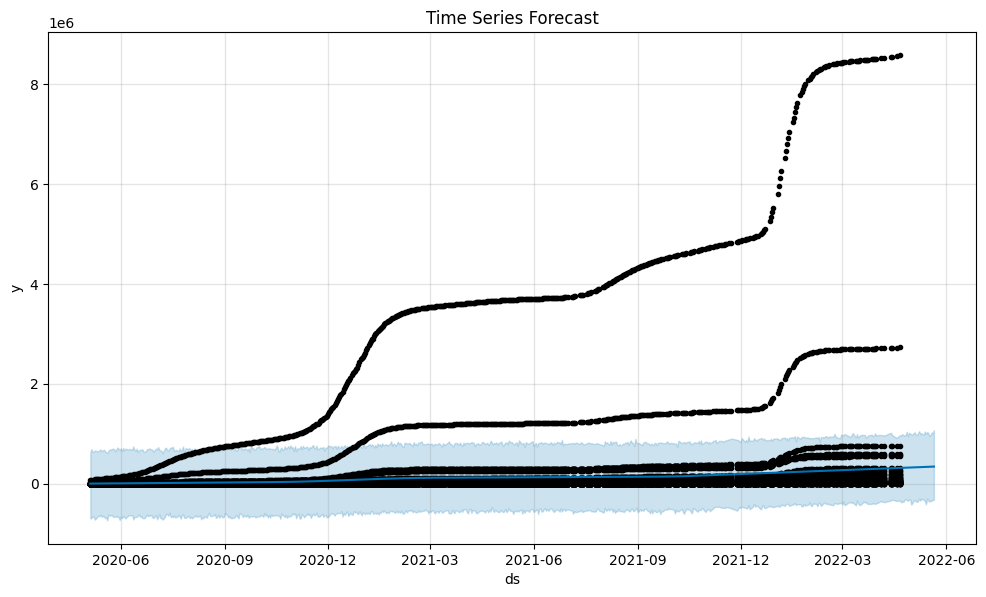

In [30]:
fig = model.plot(forecast)
plt.title('Time Series Forecast')
plt.show()

In [33]:
forecasted_values = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(forecasted_values.tail())

            ds           yhat     yhat_lower    yhat_upper
651 2022-05-17  337325.906986 -361871.094753  9.556868e+05
652 2022-05-18  338324.164336 -341792.831876  9.751332e+05
653 2022-05-19  338964.748629 -344111.437224  1.028416e+06
654 2022-05-20  340643.858938 -322831.926623  1.007474e+06
655 2022-05-21  341694.547788 -323413.250763  1.071290e+06
